In [10]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import text

# 1. Point at your local liiondb clone
cwd = os.getcwd()
liiondb_root = os.path.abspath(os.path.join(cwd, '..', 'liiondb'))
sys.path.insert(0, liiondb_root)

# 2. Import DB routines and connect
from functions.fn_db import liiondb, read_data
engine, _ = liiondb()

# 3. Shared parameterized SQL for half-cell OCV
stmt = text("""
  SELECT data_id, raw_data, raw_data_class, function
    FROM data
    JOIN parameter USING (parameter_id)
    JOIN material  USING (material_id)
   WHERE parameter.name = :param_name
     AND material.name  = :mat_name
""")


Query and plot for NCM

   data_id                                           raw_data raw_data_class  \
0      378  {{0.021551724137931026,3.483358778625954},{0.0...          array   
1      313                                       see function       function   
2      371                                       see function       function   
3      511                                       see function       function   
4      325                                       see function       function   

                                            function  
0                                               None  
1  [b'\n', b'd', b'e', b'f', b' ', b'f', b'u', b'...  
2  [b'\n', b'd', b'e', b'f', b' ', b'f', b'u', b'...  
3  [b'\n', b'd', b'e', b'f', b' ', b'f', b'u', b'...  
4  [b'\n', b'd', b'e', b'f', b' ', b'f', b'u', b'...  


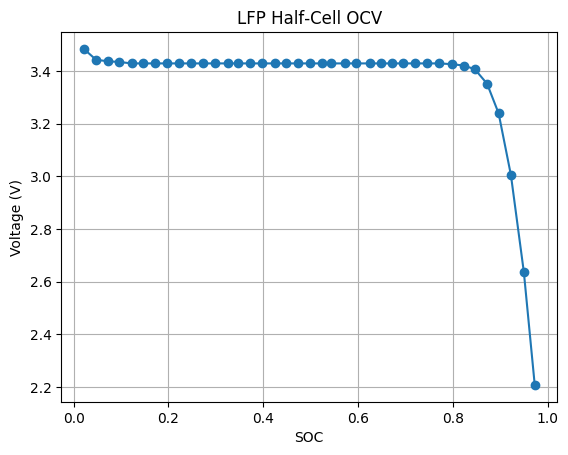

In [44]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import text

# 1) Point at your local liiondb checkout
cwd = os.getcwd()
liiondb_root = os.path.abspath(os.path.join(cwd, '..', 'liiondb'))
sys.path.insert(0, liiondb_root)

# 2) Import and connect
from functions.fn_db import liiondb, read_data
engine, _ = liiondb()

# 3) Prepare a parameterized SQLAlchemy TextClause
stmt = text("""
  SELECT data_id, raw_data, raw_data_class, function
    FROM data
    JOIN parameter USING (parameter_id)
    JOIN material  USING (material_id)
   WHERE parameter.name = :param_name
     AND material.name  = :mat_name
""")
mat_name = "LFP"  # Material name
# 4) Execute via a Connection and fetch all rows
with engine.connect() as conn:
    result = conn.execute(stmt, {"param_name": "half cell ocv", "mat_name": mat_name})
    rows = result.fetchall()
    cols = result.keys()

# 5) Build a DataFrame
df = pd.DataFrame(rows, columns=cols)
print(df.head())

# 6) Parse & plot the first curve
first = df.iloc[[0]]            # 1-row DataFrame
arr   = read_data(first)        # Nx2 array [SOC, Voltage]
soc, volt = arr[:, 0], arr[:, 1]

plt.plot(soc, volt, '-o')
plt.xlabel('SOC')
plt.ylabel('Voltage (V)')
plt.title(f'{mat_name} Half‐Cell OCV')
plt.grid(True)
plt.show()

df = pd.DataFrame({
    'SOC': soc,
    'Voltage': volt
})
df.to_csv(f'{mat_name}_half_cell_ocv.csv', index=False)


